# Kalman-Filter
Im Vorlesungsskript wird in Kapitel 4.4 der Kalman-Filter eingeführt. Eine weitere gute Quelle
ist http://www.cbcity.de/das-kalman-filter-einfach-erklaert-teil-1.

## Univariater Kalman-Filter
Zunächst soll ein einfacher Kalman-Filter für den univariaten Fall implementiert werden. Dieser soll folgendes System abbilden: Ein Fahrzeug bewegt sich mit einer konstanten Geschwindigkeit entlang einer geraden Strecke. Sie möchten eine Schätzung darüber abgeben, wie weit sich das Fahrzeug bewegt hat. Dazu stehen folgende Informationen zur Verfügung:
1. Die (konstante) Geschwindigkeit des Fahrzeugs v = 50 m/s (sie nehmen an, dass das Fahrzeug nicht genau diese Geschwindigkeit fährt, sondern dass die Geschwindigkeit in jedem Schritt normalverteilt ist mit Mittelwert v und Varianz 5).
2. Sie erhalten regelmäßig (jede Sekunde) Beobachtungen über die tatsächliche Position des Fahrzeugs (diese sind wieder normalverteilt, mit Varianz 2).

Die Schätzung möchten Sie mit einem Kalman-Filter durchführen. 
1. Warum kann hier ein Kalman-Filter verwendet werden? 
2. Bevor Sie mit der Implementierung starten, überlegen Sie sich:  
    a. Woraus besteht der Zustand des Systems?  
    b. Was wird beim Predict-Schritt berechnet? Wie wird er berechnet?  
    c. Was wird beim Update-Schritt berechnet? Wie wird er berechnet?  
3. Implementieren Sie eine Funktion `observe(state,obs.variance)`, die einen Systemzustand (d.h. Mittelwert und Varianz) übergeben bekommt, und daraus eine Observation (d.h. wieder Mittelwert und Varianz) erzeugt.
4. Implementieren Sie eine Funktion `predict(state,speed,predict.variance)`, die den Predict-Schritt für einen gegebenen Systemzustand erzeugt.
5. Implementieren Sie eine Funktion `update(state,observation)`, die den Update-Schritt berechnet. Nutzen Sie dazu folgende Formeln für die Berechnung:
\begin{equation*}
\sigma_{t}^2 = \dfrac{1}{\dfrac{1}{\sigma_{1}^2} + \dfrac{1}{\sigma_{2}^2}}
\end{equation*}

\begin{equation*}
\mu_{t} = \dfrac{\sigma_{2}^2 * \mu_1 + \sigma_{1}^2 * \mu_2}{\sigma_{1}^2 + \sigma_{2}^2}
\end{equation*}
6. Implementieren Sie eine Funktion, die den Kalman-Filter N Schritte laufen lässt.

In [1]:
#prediction, given old state and the properties of the movement (speed and variance)
predict=function(oldstate,speed=50,var=5){
    #todo: ho do we compute the new state, just based on the old state and the speed and var constants?
     
}

#observation model: get the observation density, given a state
observation=function(state,var=2){
    #todo: sample obs from normal distribution around actual position
    
    #todo: what do we return?
    
}

#update function: 
update=function(oldstate,observation){
    #todo: what do we need for newvar and newmean?
    #hint: look at the given formulas
    
    #todo: compute newmean and newvar
    
    #todo: what do we return?
    
}

#iteratively apply the kalman filter
#and save the result after each predict and update
#and plot the results
main=function(STEPS=5){
    state = list(mean=0,var=50)
    statesafterpredict = list(1:STEPS)
    statesafterupdate = list(1:STEPS)
    observations = list(1:STEPS)
  
    # do Kalman filtering
    for(i in 1:STEPS){
        #todo: predict step
        
        #make observation
        
        #update step
        
        
    }
  
    #plot everything (single plot for each step: after predict, observation density, after update) 
    for(i in 1:STEPS){
        #min and max of the plot
        ma = statesafterpredict[[i]][['mean']]+30
        mi = statesafterpredict[[i]][['mean']]-30
        res=seq(mi,ma,0.1)
        plot(0,xlim=c(mi,ma),ylim=c(0,0.5),type="l",main=paste0("Time=",i))
        predictline = dnorm(res,statesafterpredict[[i]][['mean']],
                            sqrt(statesafterpredict[[i]][['var']]))
        lines(res,predictline)
        obsline = dnorm(res,observations[[i]][['mean']],
                        sqrt(observations[[i]][['var']]))
        lines(res,obsline,col="blue")
        updateline = dnorm(res,statesafterupdate[[i]][['mean']],
                           sqrt(statesafterupdate[[i]][['var']]))
        lines(res,updateline,col="red")
        readline(prompt="Press [enter] to continue")
    }
}

Press [enter] to continue 
Press [enter] to continue 


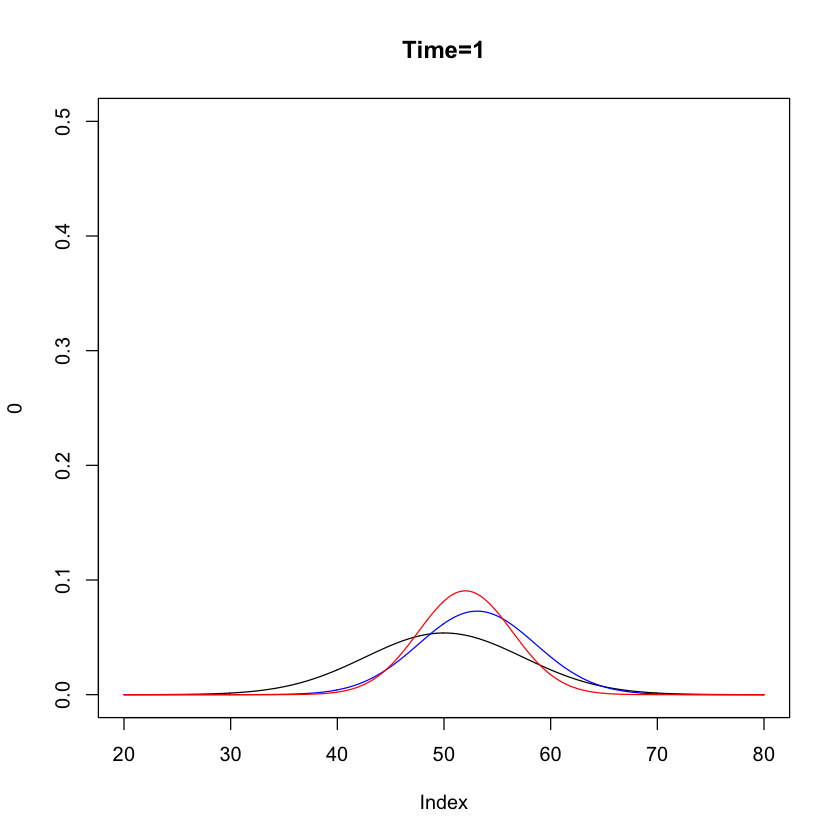

Press [enter] to continue 


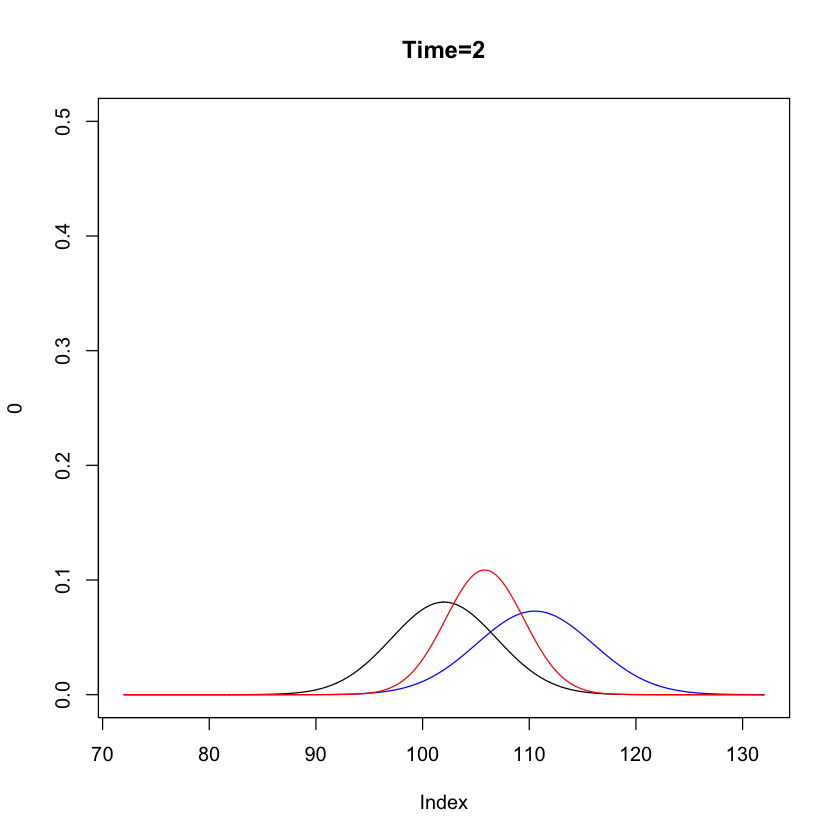

Press [enter] to continue 


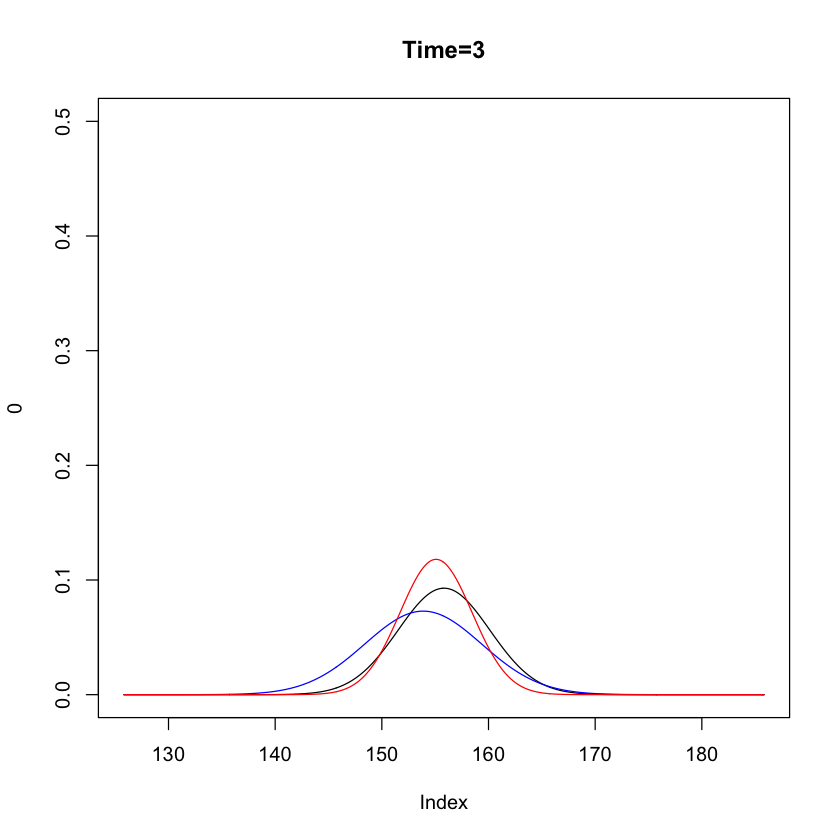

Press [enter] to continue 


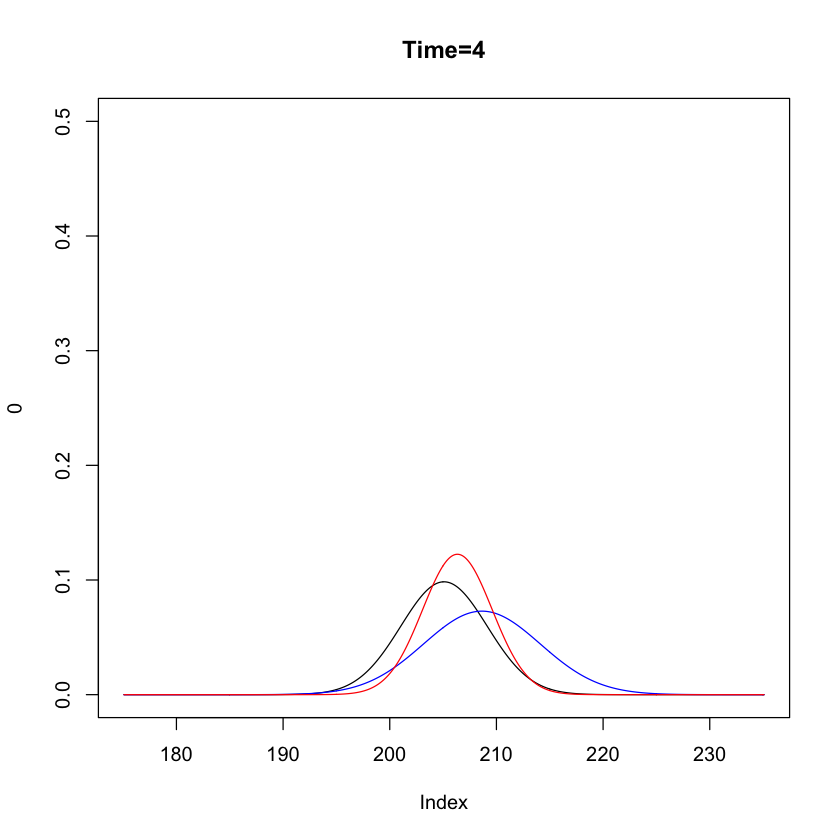

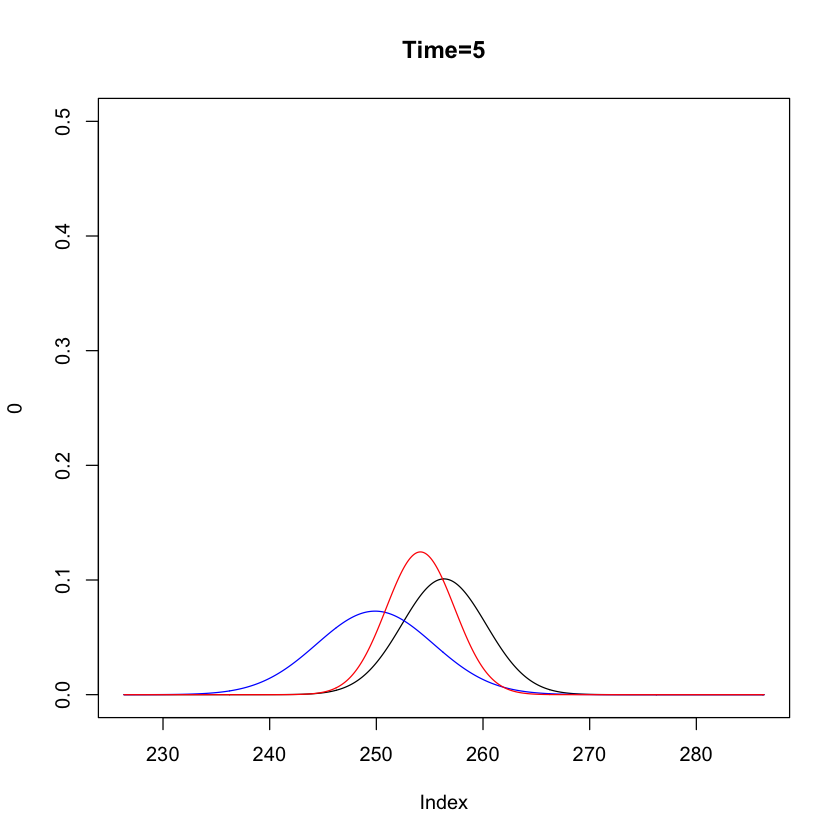

In [2]:
main()

## Multivariater Kalman-Filter

Es soll nun nicht mehr nur die 1D-Distanz des Fahrzeugs berücksichtigt werden, sondern es soll die 2D-Position des Fahrzeugs getrackt werden. Außerdem soll die (nun nicht mehr als konstant angenommene) Geschwindigkeit des Fahrzeugs in beide Richtungen getrackt werden. Erweitern Sie Ihre Kalman-Filter-Funktion so, dass auch Multivariate Zustände und Observationen verarbeitet werden können.

1. Aus welchen Komponenten besteht der Zustand nun? Wie ist der Zustand codiert?
2. Erweitern Sie die `observe`-Funktion entsprechend. Gehen Sie davon aus, dass in jedem Schritt die Position direkt beobachtet wird. Wie muss die Matrix $C$ aussehen? Nehmen Sie an, dass 
$R=\begin{bmatrix}
5 & 0\\
0 & 5
\end{bmatrix}$. Was ist die Bedeutung der Matrizen $R$ und $C$?
3. Erweitern Sie die `predict`-Funktion entsprechend. Nutzen Sie $dt=1$,
\begin{equation*}
Q=\begin{bmatrix}
1/4*dt^4 & 1/4*dt^4& 1/2*dt^3& 1/2*dt^3\\
    1/4*dt^4& 1/4*dt^4& 1/2*dt^3& 1/2*dt^3\\
    1/2*dt^3& 1/2*dt^3& dt^2& dt^2\\
    1/2*dt^3& 1/2*dt^3& dt^2& dt^2
\end{bmatrix}
\end{equation*}
und 
\begin{equation*}
A = 
\begin{bmatrix}
0& 0& dt& 0\\
0 & 1 & 0 & dt\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}
Was ist die Bedeutung von $Q$ und $A$? Welche Variablen von S.92 aus dem altbisss-Skript werden hier berechnet?
4. Erweitern Sie die `update`-Funktion entsprechend. Was wird hier genau berechnet (bezogen auf das altbisss-Skript s. 92)?
5. Erweitern sie die `main`-Funktion entsprechend. Verwenden Sie $\mu_0 = [0, 0, 50, 20]$ und
$V_0 = diag(10, 10, 10, 10)$.

In [ ]:
require(MASS)

#prediction, given old state and properties of the movement (system matrix and process covariance)
predict=function(state,A,Q){
    #todo: get oldmean and oldvar (from where did you get it?)
    
    #todo: computing newmean and newvar (how do we compute it? hint: see script p. 92)
    
    #todo: return the new state (how does it look like?)
    
}

#observation model: get the observation density, given a state
observation=function(state,R,C){
    #todo: get the elements of the state that are acually observed (how can we compute it?)
    
    #todo: sample obs(mean) form a (multivariate?) normal distribution around observed quantity
    
    #todo: return obs (what exactly did we return here?)
}

#update function: 
update=function(oldstate,observation,C){
    #todo: getting mu, y, V, R
  
    #todo: computing everything we need for computing Vnew and munew 
    
    #todo: computing Vnew (=V_t) and munew (=mu_t)

}

#iteratively apply the kalman filter
#and save the result after each predict and update
#and plot the results
main=function(STEPS=5){
    #todo: define the initial things (dt, mu0)
    #hint: state vector consists of: x, y, x', y'
   
    #todo: define initial covariance matrix V0
   
    #todo: define state dynamics system matrix A
    
    #todo: define ouput matrix C (what is observed?)
   
    #todo: define measurement noise covariance matrix R
    
    #todo: define process noise covariance matrix Q
   
    #define initial state and data structures for saving the multiple states 
    state = list(mean=mu0,var=V0)
    statesafterpredict = list(1:STEPS)
    statesafterupdate = list(1:STEPS)
    observations = list(1:STEPS)
  
    # executing Kalman filter
    for(i in 1:STEPS){
        #todo: predict step
        
        #todo: make observation
        
        #todo: update step
        
    }
  
    #plot x location (single plot for each step: after predict, observation density, after update)
    el=1
    for(i in 1:STEPS){
        #min and max of the plot
        ma = statesafterpredict[[i]][['mean']][el]+30
        mi = statesafterpredict[[i]][['mean']][el]-30
        res=seq(mi,ma,0.1)
        plot(0,xlim=c(mi,ma),ylim=c(0,0.5),type="l",main=paste0("Time=",i))
        predictline = dnorm(res,statesafterpredict[[i]][['mean']][el],
                            sqrt(statesafterpredict[[i]][['var']][el,el]))
        lines(res,predictline)
        obsline = dnorm(res,observations[[i]][['mean']][el],
                        sqrt(observations[[i]][['var']][el,el]))
        lines(res,obsline,col="blue")
        updateline = dnorm(res,statesafterupdate[[i]][['mean']][el],
                           sqrt(statesafterupdate[[i]][['var']][el,el]))
        lines(res,updateline,col="red")
        readline(prompt="Press [enter] to continue")
    }
  
}